In [167]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [168]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

# Training Data Default

In [169]:
players = pd.read_csv("Data/players.csv")
match = pd.read_csv("Data/match.csv")

# More Data

In [205]:
early_game = pd.read_csv("All_data_early_game.csv")

# Testing Data Later On

In [206]:
# players_test = pd.read_csv("Data/test_player.csv")
# match_test = pd.read_csv("Data/test_labels.csv")

# Preprocessing

In [207]:
hero_id_compiled = []

for i in tqdm(range(len(players)//10)):
    temp_hero_id = []
    temp_hero_id = [players.hero_id[(i*10)+j] for j in range(10)]
    hero_id_compiled.append(temp_hero_id)

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 14192.50it/s]


In [208]:
# account_cols = [f"account_{i}" for i in range(10)]
# players_train[account_cols] = account_id_compiled
id_number = [0,1,2,3,4,128,129,130,131,132]
hero_cols = [f"hero_{i}" for i in id_number]

players_train = pd.DataFrame(hero_id_compiled, columns=hero_cols)
players_train["match_id"] = np.arange(1,50001,1)


In [209]:
players_train

,hero_0,hero_1,hero_2,hero_3,hero_4,hero_128,hero_129,hero_130,hero_131,hero_132,match_id
0,86,51,83,11,67,106,102,46,7,73,1
1,7,82,71,39,21,73,22,5,67,106,2
2,51,109,9,41,27,38,7,10,12,85,3
3,50,44,32,26,39,78,19,31,40,47,4
4,8,39,55,87,69,101,100,22,67,21,5
...,...,...,...,...,...,...,...,...,...,...,...
49995,73,86,21,20,14,32,7,109,35,112,49996
49996,93,74,100,32,85,36,1,112,60,71,49997
49997,100,68,75,39,44,28,102,21,9,23,49998
49998,56,50,2,72,30,46,7,29,44,3,49999


In [210]:
match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151


In [211]:
match_win = match.radiant_win.copy()
match_win["match_id"] = match.match_id

In [212]:
full_data = pd.concat([early_game,players_train,match_win],axis=1)
full_data.columns

Index(['Unnamed: 0', 'match_id', 'times', 'gold_t_0', 'xp_t_0', 'gold_t_1',
       'xp_t_1', 'gold_t_2', 'xp_t_2', 'gold_t_3', 'xp_t_3', 'gold_t_4',
       'xp_t_4', 'gold_t_128', 'xp_t_128', 'gold_t_129', 'xp_t_129',
       'gold_t_130', 'xp_t_130', 'gold_t_131', 'xp_t_131', 'gold_t_132',
       'xp_t_132', 'hero_0', 'hero_1', 'hero_2', 'hero_3', 'hero_4',
       'hero_128', 'hero_129', 'hero_130', 'hero_131', 'hero_132', 'match_id',
       'radiant_win'],
      dtype='object')

In [213]:
early_game.head()

,Unnamed: 0,match_id,times,gold_t_0,xp_t_0,gold_t_1,xp_t_1,gold_t_2,xp_t_2,gold_t_3,...,gold_t_128,xp_t_128,gold_t_129,xp_t_129,gold_t_130,xp_t_130,gold_t_131,xp_t_131,gold_t_132,xp_t_132
0,0,0,900,3324,2914,5444,6117,2869,2971,5764,...,4097,5219,3736,4472,6534,7788,1767,1486,6470,3822
1,1,1,900,3184,3307,7849,8835,4041,3097,5659,...,8051,6811,5234,5266,3480,4586,4825,5591,4736,5198
2,2,2,900,3748,3855,4542,5571,5438,6076,4138,...,5547,5765,3661,4823,4698,5870,3128,2757,2214,2833
3,3,3,900,3687,4310,5598,4127,3915,5156,3142,...,3864,4096,4573,5546,2650,2511,2041,2131,5850,5730
4,4,4,900,7099,6938,7001,6732,3973,3241,2559,...,2987,3127,3198,2986,4171,3880,5576,5238,3292,3526


In [214]:
full_data

,Unnamed: 0,match_id,times,gold_t_0,xp_t_0,gold_t_1,xp_t_1,gold_t_2,xp_t_2,gold_t_3,...,hero_2,hero_3,hero_4,hero_128,hero_129,hero_130,hero_131,hero_132,match_id,radiant_win
0,0.0,0.0,900.0,3324.0,2914.0,5444.0,6117.0,2869.0,2971.0,5764.0,...,83.0,11.0,67.0,106.0,102.0,46.0,7.0,73.0,1.0,True
1,1.0,1.0,900.0,3184.0,3307.0,7849.0,8835.0,4041.0,3097.0,5659.0,...,71.0,39.0,21.0,73.0,22.0,5.0,67.0,106.0,2.0,False
2,2.0,2.0,900.0,3748.0,3855.0,4542.0,5571.0,5438.0,6076.0,4138.0,...,9.0,41.0,27.0,38.0,7.0,10.0,12.0,85.0,3.0,False
3,3.0,3.0,900.0,3687.0,4310.0,5598.0,4127.0,3915.0,5156.0,3142.0,...,32.0,26.0,39.0,78.0,19.0,31.0,40.0,47.0,4.0,False
4,4.0,4.0,900.0,7099.0,6938.0,7001.0,6732.0,3973.0,3241.0,2559.0,...,55.0,87.0,69.0,101.0,100.0,22.0,67.0,21.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,32.0,85.0,36.0,1.0,112.0,60.0,71.0,49997.0,True
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.0,39.0,44.0,28.0,102.0,21.0,9.0,23.0,49998.0,True
49998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,72.0,30.0,46.0,7.0,29.0,44.0,3.0,49999.0,True
49999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,35.0,21.0,100.0,9.0,90.0,73.0,53.0,50000.0,False


In [215]:
preprocessed_data = full_data.dropna()

In [216]:
preprocessed_data.drop([preprocessed_data.columns[0],"match_id","times"],axis=1,inplace=True)

C:\Users\bimoi\AppData\Local\Temp\ipykernel_17528\2746704643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_data.drop([preprocessed_data.columns[0],"match_id","times"],axis=1,inplace=True)


In [217]:
X_data = preprocessed_data.drop(["radiant_win"],axis=1)
Y_data = preprocessed_data.radiant_win
# Y_data = pd.DataFrame()
# Y_data["radiant_win"] = preprocessed_data.radiant_win

In [218]:
Y_data = Y_data.map({True:1,False:0})

# Train, Test, Split

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [221]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,n_estimators=200)
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=200)

# RandomForestClassifier

In [222]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=200)

In [223]:
y_pred = rf.predict(X_test)

In [224]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [225]:
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

Accuracy: 0.5254560032070555 
Precision: 0.5268767377201112 
Recall: 0.8747836122331217 
F1-Score: <function f1_score at 0x0000027EA67CCD30>


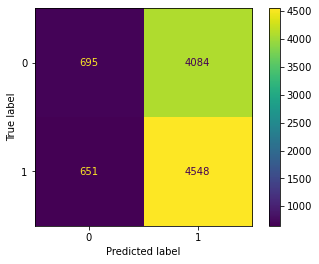

In [226]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# f1_score = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix)
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall,"\nF1-Score:", f1_score)
conf_matrix_disp.plot()

# Try Using GridSearchCV or RandomizedSearchCV

In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
param_grid = {
    "n_estimators" : [10,50,100,200],
    "max_features" : [None,"auto","sqrt","log2"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,3,4,5,6],
    "min_samples_leaf" : [1,2,4,8]
}

In [195]:
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)

In [196]:
grid_search.fit(X_train,y_train)

best_param = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(best_param,best_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 10} RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       n_estimators=200)


In [227]:
file_name = "Dota_2_Prediction_Model_Final_rfc.sav"
pickle.dump(rf, open(file_name,"wb"))

In [198]:
loaded_model = pickle.load(open(file_name, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5252555622369213


# Testing

In [199]:
# pd.read_csv("Data/test_player.csv")

In [200]:
y_pred = loaded_model.predict(X_test)

In [201]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

Accuracy: 0.5252555622369213 
Precision: 0.5273372781065089 
Recall: 0.857087901519523


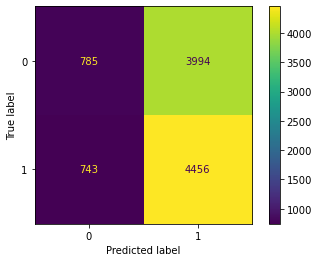

In [204]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix)
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall)
conf_matrix_disp.plot()

# Random Testing

In [135]:
hero_name = pd.read_csv("Data/hero_names.csv")

In [136]:
%%time

index_val = X_test.index
rand_test = np.random.randint(0,len(index_val))

df_test = X_test.loc[X_test.index[rand_test:rand_test+1]]

y_pred = rf.predict(df_test)

radiant = []
dire = []

hero_test = df_test[df_test.columns[10:20]]

for i in tqdm(range(len(hero_test.columns))):
    for j in range(len(hero_name)):
        if int(hero_test[hero_test.columns[i]])==hero_name.hero_id[j]:
            if i<5:
                radiant.append(hero_name.localized_name[j])
            else:
                dire.append(hero_name.localized_name[j])

print(f"This is using {rf}")
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall,"\nF1-Score:", f1_score,"\n")

if y_pred[0]==True:
    print("Radiant won!\n")
    print("With heroes in radiant :")
    for i in radiant:
        print(i)
    print("\nversus dire heroes :")
    for i in dire:
        print(i)

else:
    print("Radiant lost!\n")
    print("With heroes in radiant :")
    for i in radiant:
        print(i)
    print("\nversus dire heroes :")
    for i in dire:
        print(i)


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 229.21it/s]

This is using RandomForestClassifier(max_depth=2, max_features='log2', min_samples_leaf=2)
Accuracy: 0.5216476247745039 
Precision: 0.5213898373167303 
Recall: 0.9986535872283131 
F1-Score: 0.6850959952497195 

Radiant won!

With heroes in radiant :
Lina
Earthshaker
Disruptor
Queen of Pain
Tiny

versus dire heroes :
Slardar
Omniknight
Jakiro
Viper
Axe
CPU times: total: 93.8 ms
Wall time: 89.1 ms
